In [35]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [36]:
# Import files
base_path = '../'
data_folder_name = 'src/datasets/'
survey_filename = 'pre_launch_conjoint.csv'

# Input Data
conjoint_df = pd.read_csv(os.path.join(base_path, data_folder_name, survey_filename))
conjoint_df

,response,"ingredients_Exotic Fruits such as kiwi, dragon fruit, blue berry","ingredients_Non seasonal fruits such as pineapple, apple, banana, papaya","ingredients_Seasonal fruits such as mango, orange, grapes, watermelon","ingredients_Veggies such as carrot, cucumber, tomato",volume_350 ml,volume_500 ml,volume_Greater than 750 ml,volume_Less than 300 ml,price_Between ₹150 - ₹250,...,price_Less than ₹150,price_More than ₹400,beverage_type_Cold pressed juice,beverage_type_Dairy based lassi or smoothies,beverage_type_Fusion of two or more fruits and nuts,beverage_type_Healthy detox juice,beverage_type_Mocktails,location_Equal preference,location_Food Court in malls,location_Stand-alone outlets
0,1,False,False,True,False,False,True,False,False,True,...,False,False,True,False,False,False,False,True,False,False
1,0,True,False,False,False,False,True,False,False,True,...,False,False,True,False,False,False,False,True,False,False
2,0,False,True,False,False,False,True,False,False,True,...,False,False,True,False,False,False,False,True,False,False
3,0,False,False,False,True,False,True,False,False,True,...,False,False,True,False,False,False,False,True,False,False
4,0,False,False,True,False,True,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,0,False,False,True,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1756,0,False,False,True,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
1757,0,False,False,True,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
1758,0,False,False,True,False,True,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False


In [37]:
# Logit Model for Conjoint Analysis
# Import Libraries
import statsmodels.api as sm
# Data Format
y = conjoint_df['response']
X = conjoint_df.iloc[:,1:]
# Model
res = sm.OLS(y, X, family=sm.families.Binomial()).fit()
res.summary()

d:\Repositories\conjoint-analysis\dce-env\lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.668
Date:                Sun, 31 Mar 2024   Prob (F-statistic):             0.0507
Time:                        03:46:51   Log-Likelihood:                 11.878
No. Observations:                1760   AIC:                             8.243
Df Residuals:                    1744   BIC:                             95.81
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
ingredients_Exotic Fruits such as kiwi, dragon fruit, blue berry             0.0116      0.011      1.047      0.295      -0.010       0.033
ingredients_Non seasonal fruits such as pineapple, apple, banana, papaya     0.0089      0.011      0.780      0.436      -0.013       0.031
ingredients_Seasonal fruits such as mango, orange, grapes, watermelon        0.0278      0.009      3.241      0.001       0.011       0.045
ingredients_Veggies such as carrot, cucumber, tomato                        -0.0305      0.017     -1.837      0.066      -0.063       0.002
volume_350 ml                                                                0.0200      0.009      2.149      0.032       0.002       0.038
volume_500 ml                                                                0.0094      0.012      0.819      0.413      -0.013       0.032
volume_Greater than 750 ml                                                  -0.0293      0.016     -1.825      0.068      -0.061       0.002
volume_Less than 300 ml                                                      0.0177      0.010      1.853      0.064      -0.001       0.036
price_Between ₹150 - ₹250                                                    0.0293      0.009      3.145      0.002       0.011       0.048
price_Between ₹250 - ₹400                                                   -0.0096      0.015     -0.656      0.512      -0.038       0.019
price_Less than ₹150                                                         0.0274      0.010      2.880      0.004       0.009       0.046
price_More than ₹400                                                        -0.0292      0.017     -1.692      0.091      -0.063       0.005
beverage_type_Cold pressed juice                                             0.0179      0.010      1.754      0.080      -0.002       0.038
beverage_type_Dairy based lassi or smoothies                                -0.0041      0.013     -0.310      0.757      -0.030       0.022
beverage_type_Fusion of two or more fruits and nuts                          0.0109      0.011      0.984      0.325      -0.011       0.033
beverage_type_Healthy detox juice                                            0.0024      0.012      0.202      0.840      -0.021       0.026
beverage_type_Mocktails                                                     -0.0093      0.014     -0.660      0.509      -0.037       0.018
location_Equal preference                                                    0.0140      0.008      1.839      0.066      -0.001       0.029
location_Food Court in malls                                                 0.0057      0.010      0.600      0.549      

In [38]:
# Tabulating Results
df_res = pd.DataFrame({
    'param_name': res.params.keys()
    , 'param_w': res.params.values
    , 'pval': res.pvalues
})
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]
# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

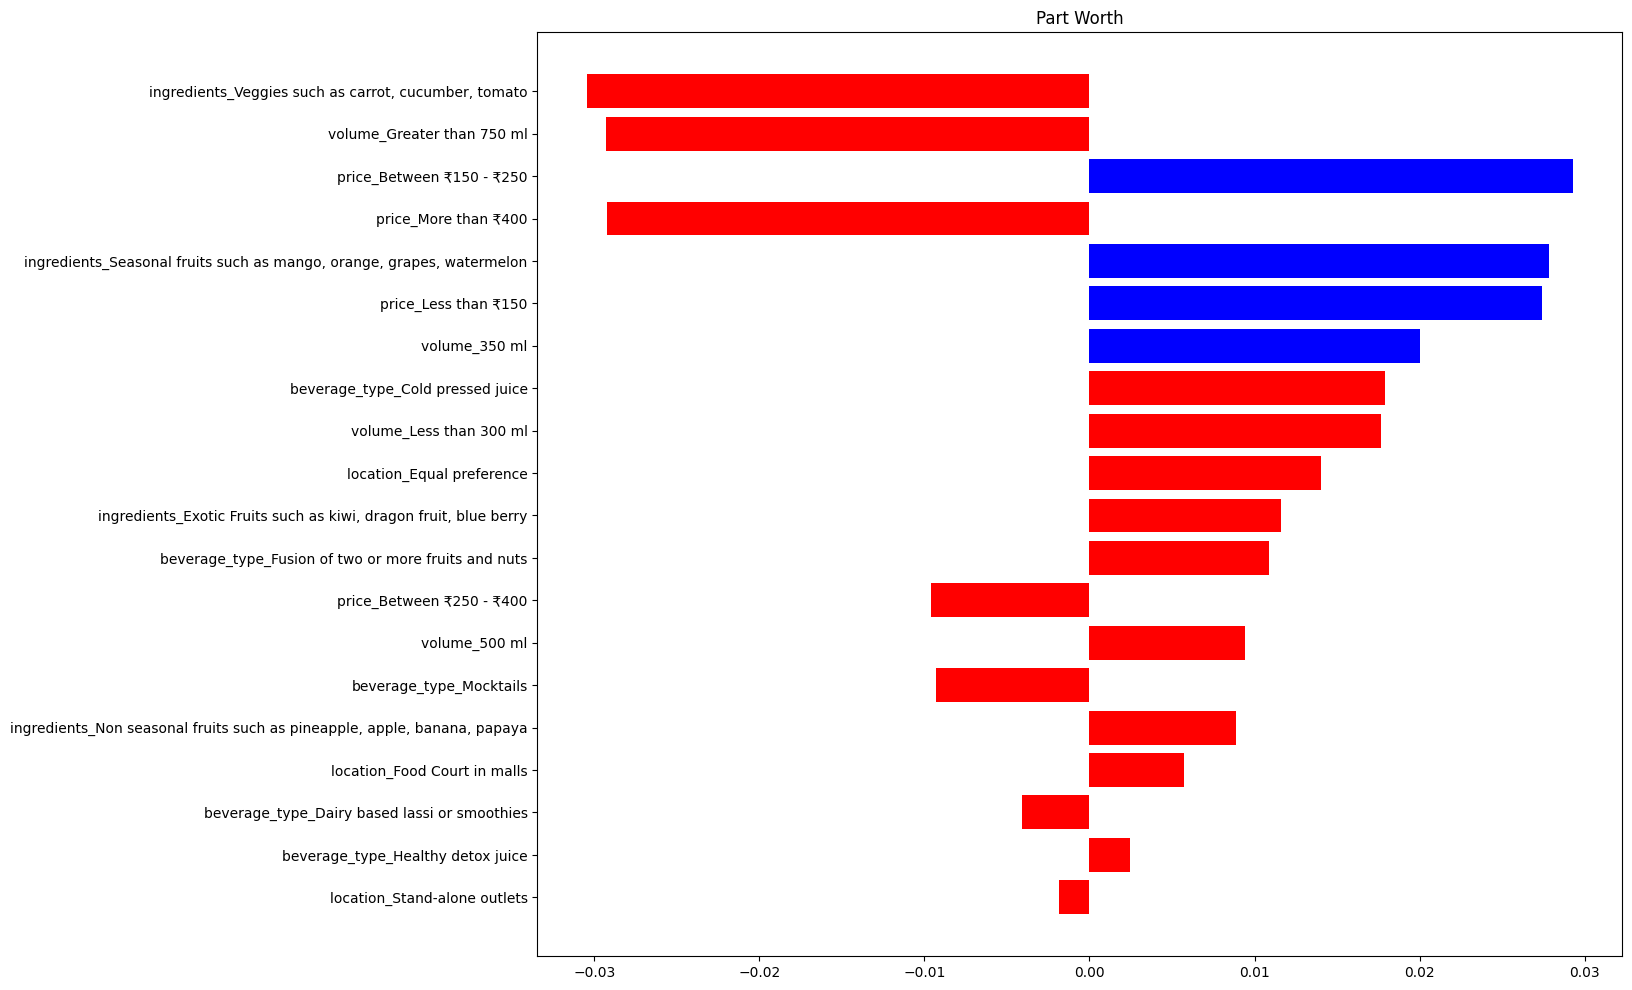

In [39]:
# Visualising Results
f, ax = plt.subplots(figsize=(14, 12))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

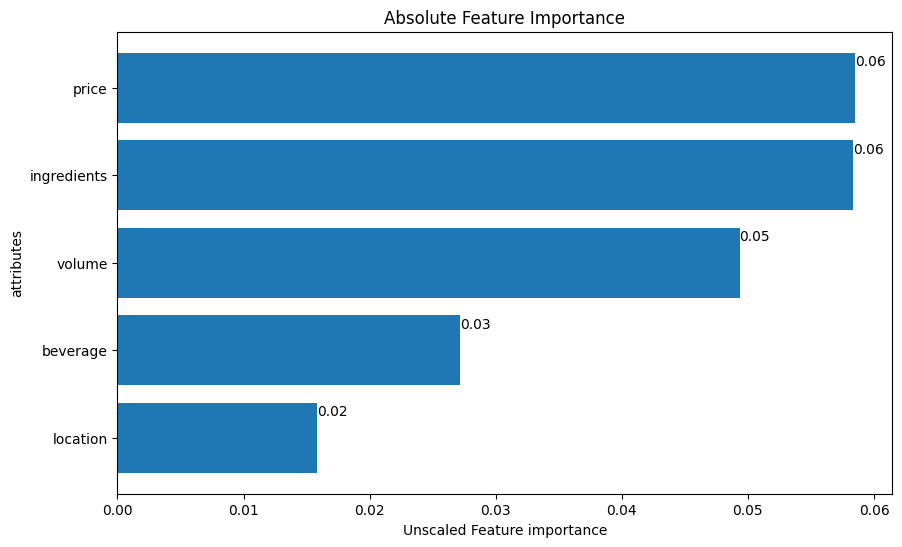

In [40]:
# Calculating Absolute Attribute Importance
# need to assemble per attribute for every level of that attribute in dicionary
range_per_feature = dict()
for key, coeff in res.params.items():
    sk =  key.split('_')
    feature = sk[0]
    if len(sk) == 1:
        feature = key
    if feature not in range_per_feature:
        range_per_feature[feature] = list()
        
    range_per_feature[feature].append(coeff)

# importance per feature is range of coef in a feature
# while range is simply max(x) - min(x)
importance_per_feature = {
    k: max(v) - min(v) for k, v in range_per_feature.items()
}

# compute relative importance per feature or normalized feature importance by dividing sum of importance for all features
total_feature_importance = sum(importance_per_feature.values())
relative_importance_per_feature = {
    k: 100 * round(v/total_feature_importance, 3) for k, v in importance_per_feature.items()
}
# Tabulating Feature Importance
alt_data = pd.DataFrame(
    list(importance_per_feature.items()), 
    columns=['attr', 'importance']
).sort_values(by='importance', ascending=True)

# Visualising Absolute Attribute Importance
f, ax = plt.subplots(figsize=(10, 6))
xbar = np.arange(len(alt_data['attr']))
plt.title('Absolute Feature Importance')
plt.barh(xbar, alt_data['importance'])
for i, v in enumerate(alt_data['importance']):
    ax.text(v , i + .25, '{:.2f}'.format(v))
plt.ylabel('attributes')
plt.xlabel('Unscaled Feature importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()


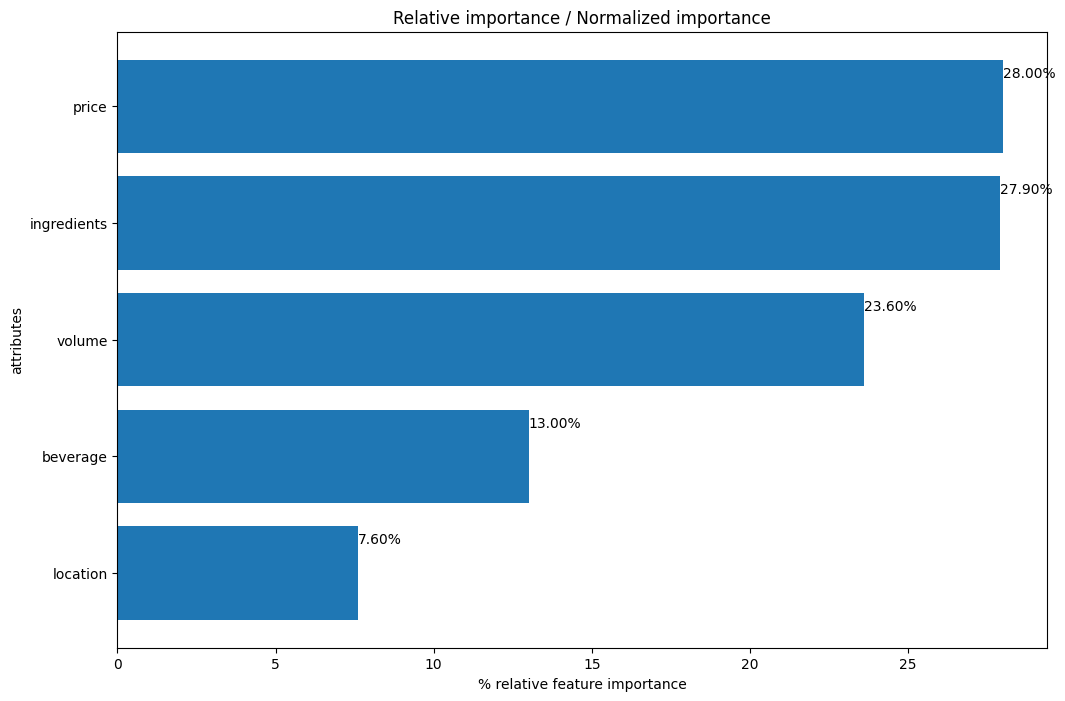

In [41]:
# Calculating Relative Percentage Attribute Importance
alt_data = pd.DataFrame(
    list(relative_importance_per_feature.items()), 
    columns=['attr', 'relative_importance (pct)']
).sort_values(by='relative_importance (pct)', ascending=True)

# Visualising Relative Percentage Attribute Importance
f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Relative importance / Normalized importance')
plt.barh(xbar, alt_data['relative_importance (pct)'])
for i, v in enumerate(alt_data['relative_importance (pct)']):
    ax.text(v , i + .25, '{:.2f}%'.format(v))
plt.ylabel('attributes')
plt.xlabel('% relative feature importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()
